# Nuestra primera aplicación de Aprendizaje Automático

La pregunta ahora es, cuándo llegaremos al límite de nuestra infraestructura actual, que estimamos que es de 100.000 solicitudes por hora. Nos gustaría saber de antemano cuándo tenemos que solicitar servidores adicionales en la nube para servir todas las solicitudes entrantes con éxito sin tener que pagar por las no utilizadas.

**Hemos recopilado las estadísticas web del último mes. Se almacenan como el número de visitas por hora. Cada línea contiene horas consecutivas y el número de visitas web en esa hora.**

## Lectura de los datos

In [6]:
import scipy as sp
import numpy as np
#data = sp.genfromtxt("web_traffic.tsv", delimiter="\t")
data = np.genfromtxt("web_traffic.tsv", delimiter="\t")

In [8]:
print(data[:10])

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]


In [9]:
print(data.shape)

(743, 2)


## Preprocesamiento y limpieza de los datos

In [11]:
# Vamos a separar los datos en dos vectores: 
## x para las horas
## y para las visitas web en cada hora en particular.
x = data[:,0]
y = data[:,1]

In [16]:
# En el vector y tenemos algunos valores nan. ¿Qué podemos hacer con eso?
#sp.sum(sp.isnan(y))
np.sum(np.isnan(y)) # Cuenta el número de valores inválidos

8

In [19]:
#Eliminamos las filas en donde aparece los valores NAN
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

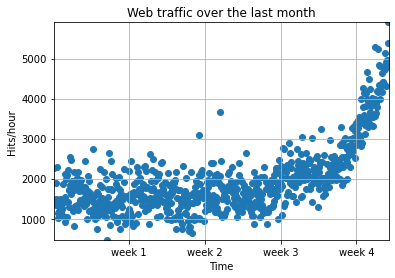

In [28]:
# Vamos a graficar nuestros datos:
import matplotlib.pyplot as plt
#%matplotlib qt
%matplotlib inline
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
#Obtenga o configure las ubicaciones actuales de las marcas y etiquetas del eje x:
plt.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.show()

En el gráfico anterior se puede observar que el tráfico en la web se mantiene "estable" durante las 3 primeras semanas; mientras que, en la última semana se ve un aumento pronunciado.

## Elección del modelo adecuado para el aprendizaje

Todos los modelos están envueltas en un error de aproximación. <br>

Este error nos permitirá seleccionar el mejor modelo, y se calcula como la distancia cuadrada de la predicción del modelo a los datos reales.


In [32]:
def error(f, x, y):
    return np.sum((f(x)-y)**2)

In [35]:
# Comenzando con una recta:

## La función polyfit devuelve los parámetros de la función del modelo ajustado, fp1. 
## De estos resultados, el más importante son los residuals (error de aprox)
fp1, residuals, rank, sv, rcond = np.polyfit(x, y, 1, full=True)
print("Model parameters: %s" %  fp1)

Model parameters: [  2.59619213 989.02487106]


In [37]:
print(residuals)

[3.17389767e+08]


Esto significa que el mejor ajuste de línea recta es la siguiente función: <br>

$ f(x) = 2.59619213*x + 989.02487106$

In [40]:
# Usamos poly1d() para crear una función de modelo a partir de los parámetros del modelo.
f1 = sp.poly1d(fp1)
print(error(f1,x,y))

317389767.339778


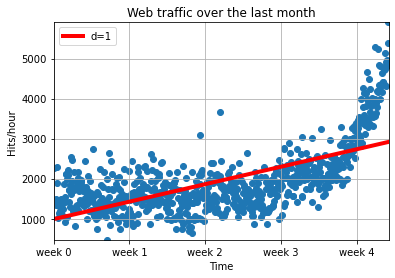

In [45]:
# Ahora podemos usar f1() para trazar nuestro primer modelo entrenado.
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
#Obtenga o configure las ubicaciones actuales de las marcas y etiquetas del eje x:
plt.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
fx = np.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4, color="red")
plt.legend(["d=%i" % f1.order], loc="upper left")

¿Qué tan bueno o malo es realmente el error de 317389767.34?

## Cosas Avanzadas

In [46]:
# Polinomio de grado 2
f2p = np.polyfit(x,y,2)
print(f2p)

[ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]


In [47]:
f2 = np.poly1d(f2p)
print(error(f2,x,y))

179983507.8781792


El error de nuestro segundo modelo es la mitad del primer modelo. ¡Esto es bueno!, sin embargo debemos ajustar un parámetro más dentro de polyfit().

$f(x) = 0.0105322215 x^2  - 5.26545650 x + 1974.76082$

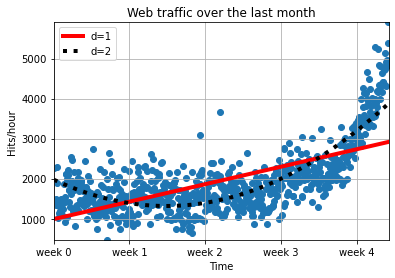

In [68]:
# Ahora podemos usar f1() para trazar nuestro primer modelo entrenado.
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
#Obtenga o configure las ubicaciones actuales de las marcas y etiquetas del eje x:
plt.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
fx = np.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4, color="red")
plt.plot(fx, f2(fx), ':', linewidth=4, color="black")
plt.legend( ['d=1', 'd=2'], loc="upper left")
#plt.legend(["d=%i" % f1.order ], loc="upper left")


In [69]:
# Polinomio de grado 3
f3p = np.polyfit(x,y,3)
print(f3p)

[ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]


In [71]:
f3 = np.poly1d(f3p)
print(error(f3,x,y))

139350144.03172523


In [73]:
# Polinomio de grado 100
f4p = np.polyfit(x,y,100)
f4 = np.poly1d(f4p)
print(error(f4,x,y))

109452384.92468244


C:\Users\cdani\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


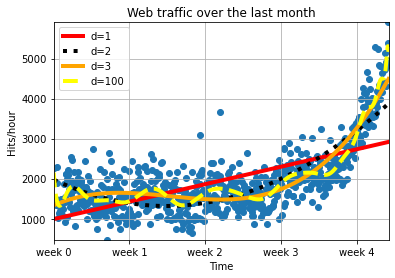

In [81]:
# Ahora podemos usar f1() para trazar nuestro primer modelo entrenado.
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
#Obtenga o configure las ubicaciones actuales de las marcas y etiquetas del eje x:
plt.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
fx = np.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4, color="red")
plt.plot(fx, f2(fx), ':', linewidth=4, color="black")
plt.plot(fx, f3(fx), '-', linewidth=4, color="orange")
plt.plot(fx, f4(fx), '--', linewidth=4, color="yellow")
plt.legend( ['d=1', 'd=2', 'd=3', 'd=100'], loc="upper left")
#plt.legend(["d=%i" % f1.order ], loc="upper left")


En la gráfica anterior podemos observar que los polinomios de grado 10 a 100 tienen un comportamiento muy oscilante, por lo que se está capturando no solamente el proceso subyacente, sino también el ruido. Esto se conoce como:

**SOBREAJUSTE** O OVERFITTING

Mientras que los modelos de de grados menores se conocen como **UNDERFITTING**

## Otra perspectiva a nuestros datos.

En las gráficas anteriores se puede observar que existe un punto de inflexión en la tercera semana. Por lo tanto vamos a dividir los datos utilizando la semana 3.5 

In [83]:
inflection = int(3.5*7*24) # calculate the inflection point in hours
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]
xb = x[inflection:] # data after
yb = y[inflection:]

In [95]:
fa = np.poly1d(np.polyfit(xa, ya, 1))
fb = np.poly1d(np.polyfit(xb, yb, 1))

In [96]:
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))

Error inflection=132950348.197616


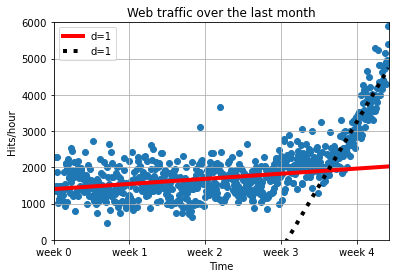

In [98]:
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
#Obtenga o configure las ubicaciones actuales de las marcas y etiquetas del eje x:
plt.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
fx = np.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, fa(fx), linewidth=4, color="red")
plt.plot(fx, fb(fx), ':', linewidth=4, color="black")
plt.ylim([0,6000])
plt.legend( ['d=1', 'd=1'], loc="upper left")
#plt.legend(["d=%i" % f1.order ], loc="upper left")

In [99]:
fa2 = np.poly1d(np.polyfit(xa, ya, 2))
fb2 = np.poly1d(np.polyfit(xb, yb, 2))
fa_error2 = error(fa2, xa, ya)
fb_error2 = error(fb2, xb, yb)
print("Error inflection=%f" % (fa_error2 + fb_error2))

Error inflection=122584668.146112


In [100]:
fa3 = np.poly1d(np.polyfit(xa, ya, 3))
fb3 = np.poly1d(np.polyfit(xb, yb, 3))
fa_error3 = error(fa3, xa, ya)
fb_error3 = error(fb3, xb, yb)
print("Error inflection=%f" % (fa_error3 + fb_error3))

Error inflection=121352906.776585


In [101]:
fa10 = np.poly1d(np.polyfit(xa, ya, 10))
fb10= np.poly1d(np.polyfit(xb, yb, 10))
fa_error10 = error(fa10, xa, ya)
fb_error10 = error(fb10, xb, yb)
print("Error inflection=%f" % (fa_error10 + fb_error10))

Error inflection=112185485.371580


C:\Users\cdani\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [102]:
fa100 = np.poly1d(np.polyfit(xa, ya, 100))
fb100 = np.poly1d(np.polyfit(xb, yb, 100))
fa_error100 = error(fa100, xa, ya)
fb_error100 = error(fb100, xb, yb)
print("Error inflection=%f" % (fa_error100 + fb_error100))

Error inflection=107975743.898440


C:\Users\cdani\anaconda3\lib\site-packages\numpy\lib\polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\cdani\anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\cdani\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\cdani\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


## Entrenamiento y prueba

Eliminemos, por ejemplo, un cierto porcentaje de los datos y entrenemos en el resto. Luego usaremos los datos de espera para calcular el error.

Como el modelo ha sido entrenado sin conocer los datos de espera, deberíamos tener una imagen más realista de cómo se comportará el modelo en el futuro.

Los errores de prueba para los modelos entrenados sólo en el tiempo después del punto de inflexión ahora muestran una imagen completamente diferente.

In [128]:
import random

datos = data

frac = 0.5  # how much of a/b do you want to exclude

# generate a list of indices to exclude. Turn in into a set for O(1) lookup time
inds = set(random.sample(list(range(len(datos))), int(frac*len(datos))))

# use `enumerate` to get list indices as well as elements. 
# Filter by index, but take only the elements
new_data = [n for i,n in enumerate(datos) if i not in inds]
new_data = np.array(new_data)

In [129]:
print(new_data.shape)

(372, 2)


In [130]:
x = new_data[:,0]
y = new_data[:,1]

In [131]:
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

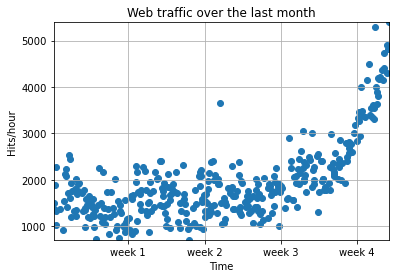

In [132]:
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
#Obtenga o configure las ubicaciones actuales de las marcas y etiquetas del eje x:
plt.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.show()

In [133]:
def error(f, x, y):
    return np.sum((f(x)-y)**2)
fp1, residuals, rank, sv, rcond = np.polyfit(x, y, 1, full=True)
print("Model parameters: %s" %  fp1)

Model parameters: [  2.50035111 995.1945458 ]


In [143]:
f1 = sp.poly1d(fp1)
print(error(f1,x,y))

f2p = np.polyfit(x,y,2)
f2 = np.poly1d(f2p)
print(error(f2,x,y))

# Polinomio de grado 3
f3p = np.polyfit(x,y,3)
f3 = np.poly1d(f3p)
print(error(f3,x,y))

# Polinomio de grado 100
f4p = np.polyfit(x,y,100)
f4 = np.poly1d(f4p)
print(error(f4,x,y))


142169016.1206959
83396368.70659271
67856612.33952492
50203716.02096587


C:\Users\cdani\anaconda3\lib\site-packages\numpy\lib\polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\cdani\anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\cdani\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


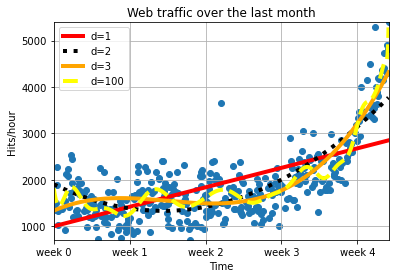

In [142]:
# Ahora podemos usar f1() para trazar nuestro primer modelo entrenado.
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
#Obtenga o configure las ubicaciones actuales de las marcas y etiquetas del eje x:
plt.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
fx = np.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4, color="red")
plt.plot(fx, f2(fx), ':', linewidth=4, color="black")
plt.plot(fx, f3(fx), '-', linewidth=4, color="orange")
plt.plot(fx, f4(fx), '--', linewidth=4, color="yellow")
plt.legend( ['d=1', 'd=2', 'd=3', 'd=100'], loc="upper left")
#plt.legend(["d=%i" % f1.order ], loc="upper left")